# Problema 6


## 1 Punto
Cargue el .csv en un dataframe de pandas y especifique las columnas A, B, C, D, E, F, G, car value, state como variables categoricas.


In [335]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions



In [313]:
costos_primas = pd.read_csv(r"C:\Users\Hp\Documents\cientifico_datos\data\costos_primas.csv")
costos_primas.drop(['Unnamed: 0'], axis = 'columns', inplace=True)
costos_primas.head()

,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,OK,1,0,9,f,0,24.0,24,0,3,9,0,0,1,1,0,0,4,543
1,OK,1,0,9,f,0,24.0,24,0,3,9,2,1,1,3,1,3,2,611
2,PA,1,1,7,f,0,74.0,74,0,2,15,2,0,2,3,1,2,2,691
3,PA,1,1,7,f,0,NaN,74,0,2,15,2,0,2,3,1,2,2,695
4,AR,1,0,4,d,4,26.0,26,0,3,1,1,0,1,1,0,2,2,628


In [314]:
from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(costos_primas[["state",'A',"B","C","D","E","F","G","car_value",
                                                              "homeowner","risk_factor","married_couple","C_previous"
                                                              ]]).toarray())

#merge one-hot encoded columns back with original DataFrame
costos_primas1 = costos_primas[["group_size","car_age",'age_oldest','age_youngest','duration_previous',"cost"]].join(encoder_df)

#view final df
costos_primas1

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost,0,1,2,3,...,72,73,74,75,76,77,78,79,80,81
0,1,9,24.0,24,9,543,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,9,24.0,24,9,611,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,7,74.0,74,15,691,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,7,NaN,74,15,695,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,4,26.0,26,1,628,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,1,2,70.0,70,9,643,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15479,1,2,70.0,70,9,643,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15480,1,2,70.0,70,9,647,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15481,1,0,25.0,25,6,642,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## 2 Punto

¿Qué otras variables categoricas identifica en el dataframe?

In [315]:
costos_primas["homeowner"].unique()

array([0, 1], dtype=int64)

In [316]:
costos_primas["risk_factor"].unique()

array([0, 4, 3, 1, 2], dtype=int64)

In [317]:
costos_primas["married_couple"].unique()

array([0, 1], dtype=int64)

In [318]:
costos_primas["C_previous"].unique()

array([3, 2, 0, 1, 4], dtype=int64)

### Las anteriores variables son variables categoricas ya se presentan doso varios niveles de factores en su información.

## Punto 3
Convierta todas las variables categoricas para que queden en un formato de one hot encoding

In [319]:
costos_primas1

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost,0,1,2,3,...,72,73,74,75,76,77,78,79,80,81
0,1,9,24.0,24,9,543,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,9,24.0,24,9,611,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,7,74.0,74,15,691,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,7,NaN,74,15,695,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,4,26.0,26,1,628,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,1,2,70.0,70,9,643,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15479,1,2,70.0,70,9,643,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15480,1,2,70.0,70,9,647,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15481,1,0,25.0,25,6,642,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Punto 4
Analice los valores extremos y faltantes para proponer un esquema de imputaciones y de limpieza
adicional. Explique su propuesta y apl ́ıquela al dataset.

## Valores Ausentes

In [326]:
costos_primas1.isnull().sum()

group_size           0
car_age              0
age_oldest           0
age_youngest         0
duration_previous    0
                    ..
77                   0
78                   0
79                   0
80                   0
81                   0
Length: 88, dtype: int64

## Imputación de valos ausentes
Se utiliza la media para imputar los valores faltantes en la variable númerica y la moda para la variable categorica,sabiendo de antemano que no es el método mas optico para imputación; el método más optimo en este caso seria el algoritmo Random Forest, tampoco seria viable utilizar el algoritmo KNN ya que presenta dos problemas: su coste computacional elevado hace que solo sea aplicable en conjuntos de datos de tamaño pequeño o moderado. Si hay variables categóricas, debido a la dificultad de medir "distancias" en este contexto, puede dar lugar a resultados poco realistas.

In [327]:
costos_primas1["age_oldest"] = np.where(costos_primas1["age_oldest"].isnull(),costos_primas1["age_oldest"].mean(),costos_primas1["age_oldest"])
#costos_primas1["car_value"] = np.where(costos_primas1["car_value"].isnull(),costos_primas1["car_value"].mode()[0],costos_primas1["car_value"])

In [328]:
costos_primas1.isnull().sum()

group_size           0
car_age              0
age_oldest           0
age_youngest         0
duration_previous    0
                    ..
77                   0
78                   0
79                   0
80                   0
81                   0
Length: 88, dtype: int64

### Variable Respuesta

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Ins

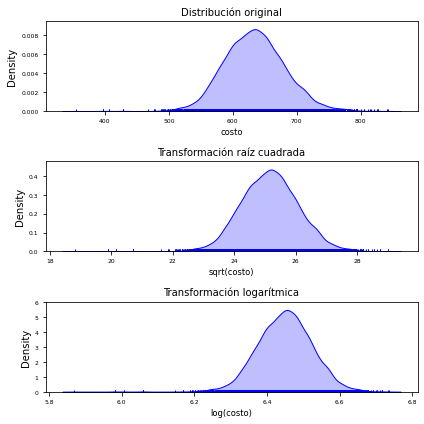

In [307]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    costos_primas1.cost,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('costo', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(costos_primas1.cost),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(costo)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(costos_primas1.cost),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(costo)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()


La variable de respuesta se distribuye de forma normal,excelente para un modelo de regresión lineal (LM)

## Punto 5
Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (80-20).
Use un valor de semilla de 1337

In [329]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split
import random
random.seed(1337)
X_train, X_test, y_train, y_test = train_test_split(
                                        costos_primas1.drop('cost', axis = 'columns'),
                                        costos_primas['cost'],
                                        train_size   = 0.8,
                                        random_state = 1337,
                                        shuffle      = True
                                    )

## Punto 6
Ajuste un modelo de regresión lineal múltiple a los datos de entrenamiento siendo el costo la
variable dependiente y todas las dem ́as variables independientes.

In [333]:
#Cargamos el conjunto de entrenamiento al modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [337]:
#Predicción de los resultados del conjunto de pruebas (x_test)
y_pred = regressor.predict(X_train)
y_pred

array([606.62255859, 659.35986328, 633.93359375, ..., 602.91894531,
       663.97363281, 632.26318359])

In [338]:
r2_score(y_train, y_pred)

0.48056099997496415